In [1]:
import pandas as pd
import os
import gzip
import pickle

# category = "groupbuys"
category = "hardware"
# category = "miners"
# category = "mining"
# category = "mining_support"
# category = "pools"

# category = "mining_speculation"

with gzip.open('cleaned-data/'+category+'.pkl.gz', 'rb') as f:
    df = pickle.load(f)

In [5]:
categories = [
    "groupbuys",
    "hardware",
    "miners",
    "mining",
    "mining_support",
    "pools",
    "mining_speculation"
]

total_threads = 0
total_chars = 0
total_posts_global = 0
for cat in categories:
    with gzip.open('cleaned-data/'+cat+'.pkl.gz', 'rb') as f:
        df_ = pickle.load(f)
    # print(cat, "number of threads: ", len(df))
    # print(cat, "average characters per threads: ", df['post'].str.len().mean())
    # print(cat, "median characters per threads: ", df['post'].str.len().median())
    # print(cat, "max characters in a thread: ", df['post'].str.len().max())
    # print(cat, "total characters in the category ", cat, ": ", df_['post'].str.len().sum())
    
    # total_threads += len(df_)
    # total_chars += df_['post'].str.len().sum()

    total_threads += len(df_)
    total_posts = 0
    for (id,row) in df_.iterrows():
        for post in row["post"].split("<sep>"):
            total_chars += len(post)
            total_posts += 1

    # print(cat, "average characters per post in the thread: " , total_chars/total_posts)
    print("total posts in the category", cat, ":", total_posts)
    total_posts_global += total_posts


print("total threads: ", total_threads)
print("total characters: ", total_chars)
print("total posts: ", total_posts_global)

total posts in the category groupbuys : 80095
total posts in the category hardware : 349144
total posts in the category miners : 60831
total posts in the category mining : 39236
total posts in the category mining_support : 58811
total posts in the category pools : 209797
total posts in the category mining_speculation : 63863
total threads:  32948
total characters:  273954272
total posts:  861777


In [3]:
#print a sample
for (id,row) in df.tail(50).iterrows():
    if(len(row["post"]) < 100):
        continue
    print("id:", id)
    print("topic:", row["topic"])
    print("posts:")
    for (post, date) in zip(row["post"].split("<sep>"), row["dates"].split("<sep>")):
        # print("date:", date[:10])
        print("date:", date)
        if (post.count("[") > 3) and len(post) > 1000:
            print("<truncated this post as it contains a long error message>")
            print(post)
        else:
            print(post)
        print("---")
    print("\n\n\n\n\n")

id: 763
topic: Antminer S19 Control Board
posts:
date: 2023-07-06 08:22:08
The Antminer S19 Control Board is a powerful and essential component of the Antminer S19 mining rig. Designed to optimize performance and efficiency, this control board plays a crucial role in ensuring the smooth operation of your mining equipment.The Antminer S19 Control Board is engineered to deliver exceptional performance, allowing you to maximize the hashing power of your mining rig. With its advanced chipset and optimized firmware, this control board ensures efficient communication between the different components of your Antminer S19, resulting in higher mining productivity and increased profitability.The Antminer S19 Control Board features a user-friendly interface that simplifies the management and monitoring of your mining rig. With its intuitive design and easy-to-navigate settings, you can efficiently control various parameters such as fan speed, voltage, and temperature. To Know More:<link>
---
date

<AxesSubplot: xlabel='month'>

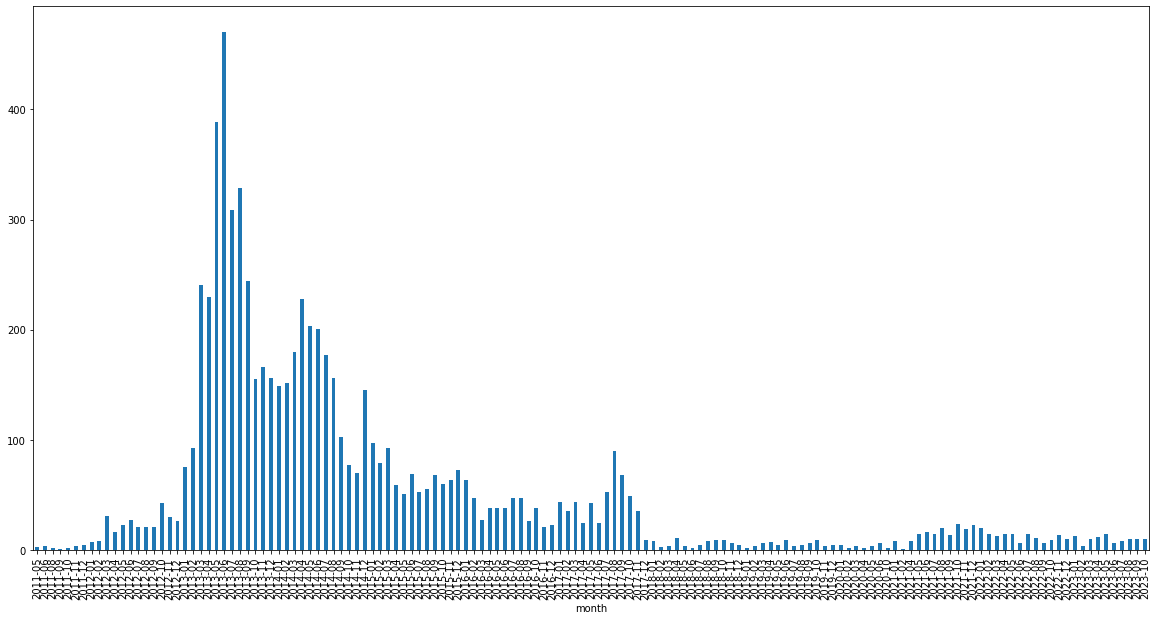

In [4]:
df["month"] = df["dates"].apply(lambda x: x.split("<sep>")[0][:7])
#plot distribution of months in threads
df["month"].value_counts().sort_index().plot(kind="bar", figsize=(20,10))